# Surface Mass Balance: Correlation

Import relevant Libaries 

In [1]:
%pip install pyarrow
%pip install plotly
%pip install feature_engine
%pip update pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: unknown command "update"
Note: you may need to restart the kernel to use updated packages.


In [77]:
# Base libraries
import pandas as pd
import numpy as np
import os
import math as math
import datetime
from scipy import stats

# Visualizations
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns

# Set WD
import os
from pyrsistent import v
os.getcwd()
#os.chdir('/Users/asgerlyngeholst-hansen/Desktop/GEUS-Master-Thesis/')
#os.chdir('C:\\Users\\nifu18ab\\Desktop\\GEUS-Master-Thesis')
#os.chdir('/Users/nilsfulde/Desktop/GEUS-Master-Thesis')
#os.chdir('/Users/nilsfulde/Desktop/Master_Thesis')

'c:\\Users\\mabj16ac\\Desktop\\Thesis\\GEUS-Master-Thesis\\scripts'

#### Load KM_L 

In [78]:
df = pd.read_csv('../data//promice/preprocessed/daily/KAN_L.csv')

In [79]:
# This bit to only focus on the time where we see Ice Ablation


In [80]:
# This bit retrieve the indexes for all melting season categories and remove column from df
for category in ['pre','beginning', 'middle', 'end']:
    exec(f"indices_{category} = df[df['Melting Season'] == '{category}'].index")
    
display(indices)
df_test = df.drop(columns=['Melting Season', 'Ablation', 'Surface height from combined measurements DELTA','Unnamed: 0']) 

Int64Index([  17,   18,  368,  369,  370,  371,  372,  373,  374,  375,
            ...
            5133, 5134, 5135, 5136, 5137, 5138, 5139, 5140, 5141, 5142],
           dtype='int64', length=240)

#### Correlation and Pairplot 

In [81]:
df_test.columns

Index(['stid', 'Datetime', 'Air pressure (upper boom)',
       'Air temperature (upper boom)',
       'Relative humidity (upper boom) - corrected',
       'Specific humidity (upper boom)', 'Wind speed (upper boom)',
       'Wind from direction (upper boom)',
       'Downwelling shortwave radiation - corrected',
       'Upwelling shortwave radiation - corrected',
       'Downwelling longwave radiation', 'Upwelling longwave radiation',
       'Surface temperature', 'Latent heat flux (upper boom)',
       'Sensible heat flux (upper boom)',
       'Surface height from combined measurements', 'Albedo', 'Cloud cover'],
      dtype='object')

In [82]:
# Do not run

#sns.pairplot(data = exclude, kind='reg')

Text(0.5, 1.0, 'Correlation Heatmap')

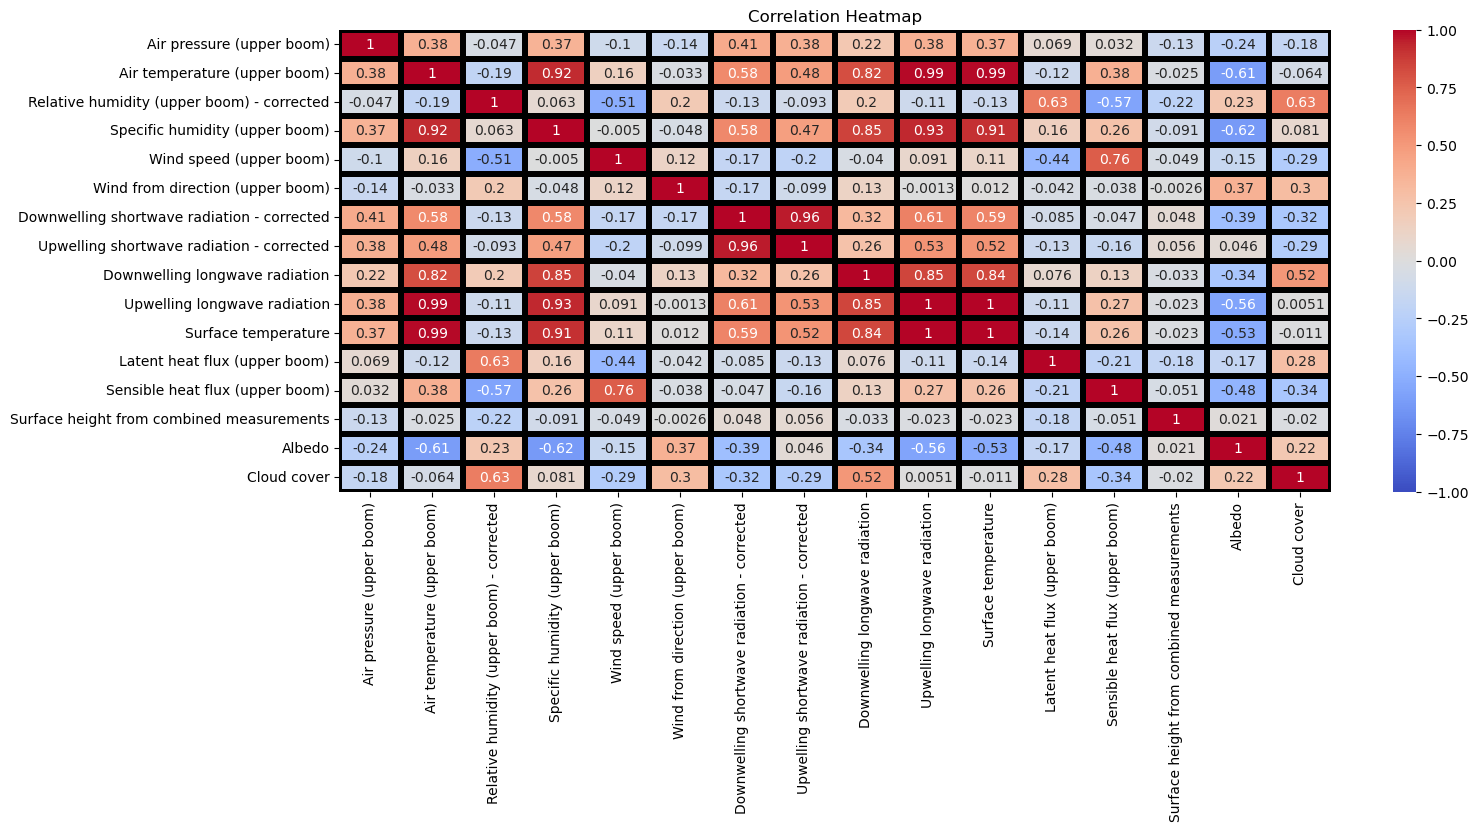

In [83]:
# Heatmap
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df_test.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

heatmap.set_title('Correlation Heatmap')


In [90]:
# Correlation with target variable only

for period in ['pre','beginning', 'middle', 'end']:
    indices = eval(f'indices_{period}')
    df_period = indices.intersection(df_test.index)
    df_period = df_test.loc[df_period]
    corr_matrix = df_period.corr()
    print('PRINTING PERIOD',period)

    display(pd.DataFrame(corr_matrix["Surface height from combined measurements"].abs().sort_values(ascending=False)))
    display(pd.DataFrame(corr_matrix["Surface height from combined measurements"].sort_values(ascending=False)))

    



PRINTING PERIOD pre


,Surface height from combined measurements
Surface height from combined measurements,1.000000
Relative humidity (upper boom) - corrected,0.211081
Latent heat flux (upper boom),0.107265
Wind speed (upper boom),0.085751
Air pressure (upper boom),0.072290
Upwelling shortwave radiation - corrected,0.070910
Specific humidity (upper boom),0.069493
Sensible heat flux (upper boom),0.068329
Downwelling shortwave radiation - corrected,0.066695
Albedo,0.026453


,Surface height from combined measurements
Surface height from combined measurements,1.000000
Upwelling shortwave radiation - corrected,0.070910
Downwelling shortwave radiation - corrected,0.066695
Albedo,0.026453
Surface temperature,0.009933
Upwelling longwave radiation,0.006723
Air temperature (upper boom),0.004391
Wind from direction (upper boom),-0.002400
Downwelling longwave radiation,-0.011893
Cloud cover,-0.023155


PRINTING PERIOD beginning


,Surface height from combined measurements
Surface height from combined measurements,1.000000
Relative humidity (upper boom) - corrected,0.353029
Upwelling longwave radiation,0.294399
Air temperature (upper boom),0.270516
Albedo,0.266613
Surface temperature,0.236290
Wind from direction (upper boom),0.167276
Sensible heat flux (upper boom),0.115947
Latent heat flux (upper boom),0.112410
Upwelling shortwave radiation - corrected,0.096698


,Surface height from combined measurements
Surface height from combined measurements,1.000000
Upwelling longwave radiation,0.294399
Air temperature (upper boom),0.270516
Surface temperature,0.236290
Sensible heat flux (upper boom),0.115947
Downwelling longwave radiation,0.076645
Downwelling shortwave radiation - corrected,0.039574
Air pressure (upper boom),0.032553
Wind speed (upper boom),0.005823
Cloud cover,-0.033747


PRINTING PERIOD middle


,Surface height from combined measurements
Surface height from combined measurements,1.000000
Specific humidity (upper boom),0.308189
Relative humidity (upper boom) - corrected,0.304062
Latent heat flux (upper boom),0.299770
Air pressure (upper boom),0.164763
Wind speed (upper boom),0.120277
Sensible heat flux (upper boom),0.101904
Downwelling longwave radiation,0.086370
Upwelling shortwave radiation - corrected,0.085703
Wind from direction (upper boom),0.080060


,Surface height from combined measurements
Surface height from combined measurements,1.000000
Upwelling shortwave radiation - corrected,0.085703
Downwelling shortwave radiation - corrected,0.077285
Albedo,0.022296
Upwelling longwave radiation,-0.040933
Air temperature (upper boom),-0.049824
Surface temperature,-0.064373
Cloud cover,-0.071661
Wind from direction (upper boom),-0.080060
Downwelling longwave radiation,-0.086370


PRINTING PERIOD end


,Surface height from combined measurements
Surface height from combined measurements,1.000000
Latent heat flux (upper boom),0.372186
Air pressure (upper boom),0.357144
Relative humidity (upper boom) - corrected,0.301388
Specific humidity (upper boom),0.265530
Downwelling longwave radiation,0.145977
Albedo,0.130759
Cloud cover,0.121351
Upwelling longwave radiation,0.111722
Air temperature (upper boom),0.101997


,Surface height from combined measurements
Surface height from combined measurements,1.000000
Albedo,0.130759
Wind from direction (upper boom),0.094187
Wind speed (upper boom),0.045912
Upwelling shortwave radiation - corrected,0.001657
Sensible heat flux (upper boom),-0.013996
Downwelling shortwave radiation - corrected,-0.037863
Surface temperature,-0.087726
Air temperature (upper boom),-0.101997
Upwelling longwave radiation,-0.111722


In [50]:
# Define the periods and the corresponding index names
periods = ['pre', 'beginning', 'middle', 'end']
index_names = [f'indices_{period}' for period in periods]

# Define an empty dataframe to store the results
result_df = pd.DataFrame(columns=['Period', 'Index', 'Value'])

# Loop over the periods
for period in ['pre','beginning', 'middle', 'end']:
    indices = eval(f'indices_{period}')
    df_period = indices.intersection(df_corr)
    
    # Calculate the correlation matrix for the current period
    df_period_corr = df_period.corr()
    
    # Loop over the index names in the correlation matrix
    for index in df_period_corr.index:
        # Loop over the column names in the correlation matrix
        for column in df_period_corr.columns:
            # Add the values to the result dataframe
            result_df = result_df.append({'Period': period, 'Index': f'{index}-{column}', 'Value': df_period_corr.loc[index, column]}, ignore_index=True)

# Set the 'Index' column as the index of the result dataframe
result_df = result_df.set_index('Index')

# Print the result dataframe
print(result_df)

AttributeError: 'Index' object has no attribute 'corr'